In [ ]:
### Import needed modules


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="whitegrid")

In [ ]:
#import the sequencing yield datasheet
extract = pd.read_csv('../Table_S3_extraction_exp1.csv') 


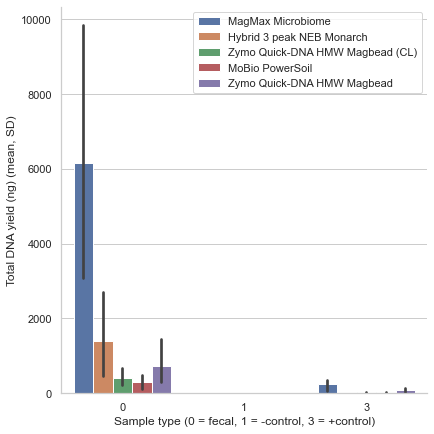

In [3]:
#grouped bar
groupbar=sns.catplot(data=extract, kind="bar", x="control", y="yield_final_ng", hue="extraction_kit", height=6, legend=False)
groupbar.set_axis_labels("Sample type (0 = fecal, 1 = -control, 3 = +control)", "Total DNA yield (ng) (mean, SD)")
plt.legend()
plt.savefig("extraction.png", dpi=600)
#groupbar.legend.set_title("non")

In [4]:
##Statistical analysis

#assigning the sample values to arrays for each kit

MMax=extract.loc[extract['extraction_kit'] == 'MagMax Microbiome']
Hyb3=extract.loc[extract['extraction_kit'] == 'Hybrid 3 peak NEB Monarch']
ZyCL=extract.loc[extract['extraction_kit'] == 'Zymo Quick-DNA HMW Magbead (CL)']
Mbio=extract.loc[extract['extraction_kit'] == 'MoBio PowerSoil']
Zy=extract.loc[extract['extraction_kit'] == 'Zymo Quick-DNA HMW Magbead']

#selects only DNA yield and assigns
DNA_MMax=MMax["yield_final_ng"]
DNA_Hyb3=Hyb3["yield_final_ng"]
DNA_ZyCL=ZyCL["yield_final_ng"]
DNA_Mbio=Mbio["yield_final_ng"]
DNA_Zy=Zy["yield_final_ng"]




In [5]:
#ensuring the samples are correct and same length
#DNA_MMax.shape
#DNA_Hyb3.shape
#DNA_ZyCL.shape
#DNA_Mbio.shape
#DNA_Zy

In [6]:
#statistical comparison DNA Yield per kit... using the Friedman test (paired values across)

#perform Friedman test
stats.friedmanchisquare(DNA_MMax, DNA_Hyb3, DNA_ZyCL, DNA_Mbio, DNA_Zy)


#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
#statistical test for yields Gb across platforms
#MannwhitneyuResult(statistic=194.0, pvalue=0.0036685130878538197)
#stats.mannwhitneyu(ont_gb,pb_gb, use_continuity=True, alternative='two-sided')

#statistical test for yields million reads across platforms
#MannwhitneyuResult(statistic=202.0, pvalue=0.0012734571838948568)
#stats.mannwhitneyu(ont_reads,pb_reads, use_continuity=True, alternative='two-sided')

FriedmanchisquareResult(statistic=21.963636363636358, pvalue=0.00020378850694716653)